<a href="https://colab.research.google.com/github/katherine984/medallion/blob/main/Medallion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
bronze_path = "/content/drive/MyDrive/Medallion/Bronze/username.csv"
df = pd.read_csv(bronze_path)
df.head()

,Username; Identifier;First name;Last name
0,booker12;9012;Rachel;Booker
1,grey07;2070;Laura;Grey
2,johnson81;4081;Craig;Johnson
3,jenkins46;9346;Mary;Jenkins
4,smith79;5079;Jamie;Smith


In [10]:
silver_path = "/content/drive/MyDrive/Medallion/Silver/username_silver.csv"
df.to_csv(silver_path, index=False)

Finances

In [21]:
import pandas as pd
bronze_path = "/content/drive/MyDrive/Medallion/Bronze/finance.csv"
df = pd.read_csv(bronze_path)

In [26]:

# Clean column names properly
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_", regex=False)
)
print(df.columns[:5])
df = df[df["state"].str.strip().str.lower() != "united states"]
# Convert year to numeric
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Convert all finance columns to numeric
finance_cols = [c for c in df.columns if c not in ["state", "year"]]
df[finance_cols] = df[finance_cols].apply(lambda col: pd.to_numeric(col, errors="coerce"))

# Drop rows missing state or year
df = df.dropna(subset=["state", "year"])

Index(['state', 'year', 'totals.capital_outlay', 'totals.revenue',
       'totals.expenditure'],
      dtype='object')


In [27]:
avg_by_state = (
    df.groupby("state")[["totals.revenue", "totals.expenditure"]]
    .mean()
    .reset_index()
)

In [28]:
silver_path = "/content/drive/MyDrive/Medallion/Silver/state_finance_avg.csv"
avg_by_state.to_csv(silver_path, index=False)

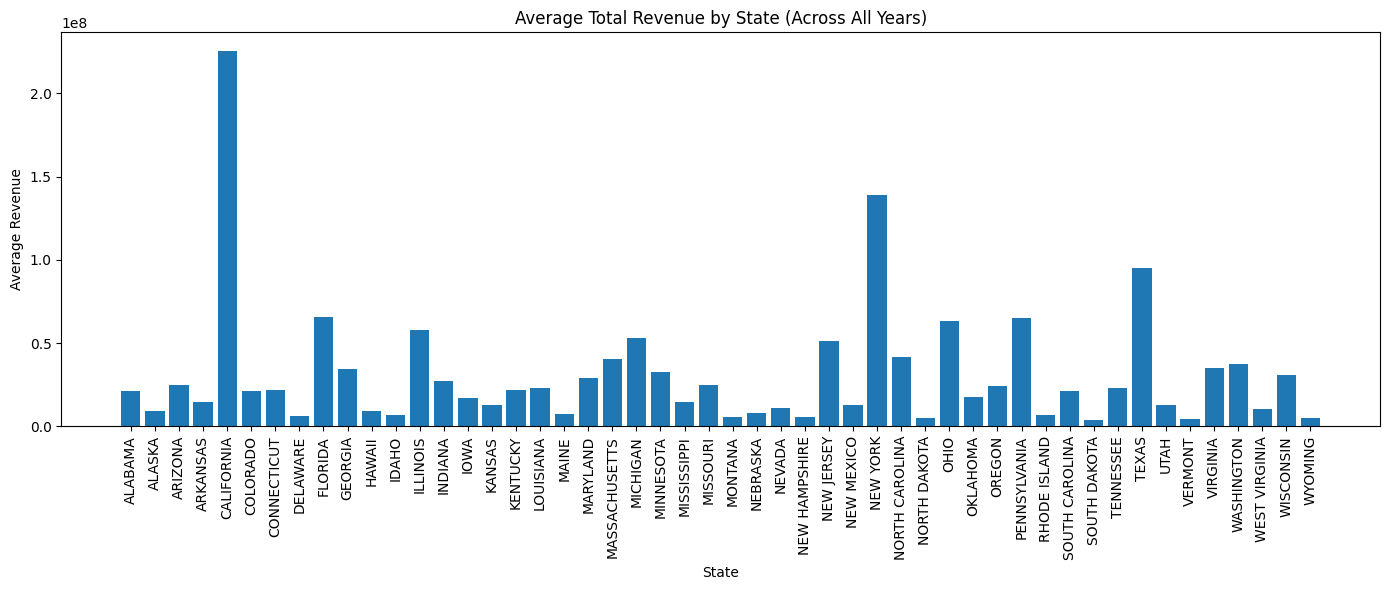

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(avg_by_state["state"], avg_by_state["totals.revenue"])
plt.xticks(rotation=90)
plt.title("Average Total Revenue by State (Across All Years)")
plt.xlabel("State")
plt.ylabel("Average Revenue")
plt.tight_layout()
plt.show()